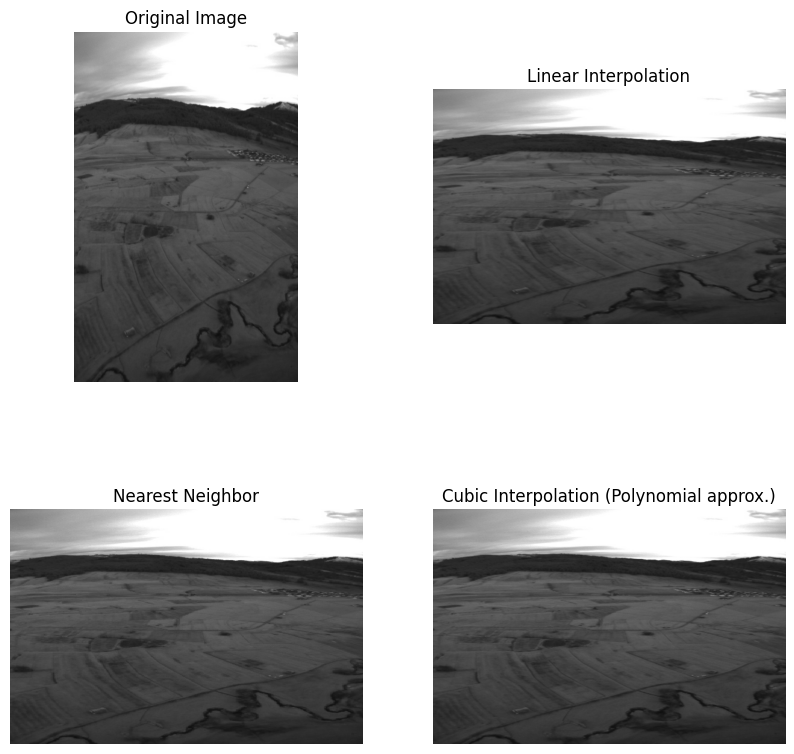

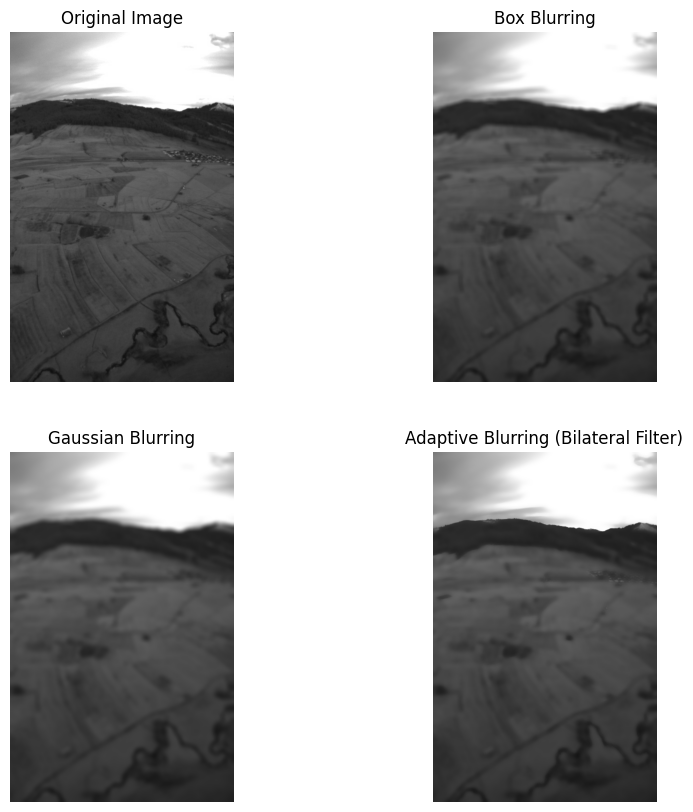

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/grayscale_img.jpg')

if image is None:
    raise ValueError("Image not loaded. Please check the path.")

def resize_image(image, width, height, interpolation_method):
    resized_img = cv2.resize(image, (width, height), interpolation=interpolation_method)
    return resized_img

image_linear = resize_image(image, 600, 400, cv2.INTER_LINEAR)  # Linear Interpolation
image_nearest = resize_image(image, 600, 400, cv2.INTER_NEAREST)  # Nearest Neighbor
image_cubic = resize_image(image, 600, 400, cv2.INTER_CUBIC)  # Cubic (approximates Polynomial Interpolation)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(image_linear, cv2.COLOR_BGR2RGB))
plt.title("Linear Interpolation")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(image_nearest, cv2.COLOR_BGR2RGB))
plt.title("Nearest Neighbor")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(image_cubic, cv2.COLOR_BGR2RGB))
plt.title("Cubic Interpolation (Polynomial approx.)")
plt.axis('off')

plt.show()


def blur_image(image, method='box'):
    if method == 'box':
        return cv2.blur(image, (10,10))
    elif method == 'gaussian':
        return cv2.GaussianBlur(image, (15,15), 5)
    elif method == 'adaptive':
        return cv2.bilateralFilter(image, 15, 100, 100)


box_blurred = blur_image(image, method='box')
gaussian_blurred = blur_image(image, method='gaussian')
adaptive_blurred = blur_image(image, method='adaptive')

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(box_blurred, cmap='gray')
plt.title("Box Blurring")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gaussian_blurred, cmap='gray')
plt.title("Gaussian Blurring")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(adaptive_blurred, cmap='gray')
plt.title("Adaptive Blurring (Bilateral Filter)")
plt.axis('off')

plt.show()


Naive Bayes - Average K-Fold Accuracy: 0.8226

Metrics for Naive Bayes:
Accuracy: 0.8111
Precision: 0.8480
Recall: 0.8111
F1-Score: 0.8151
Confusion Matrix:
[[33  0  0  0  1  1  0  0  1  0]
 [ 0 29  1  0  0  0  1  0  3  2]
 [ 0  3 19  0  0  0  0  0 13  0]
 [ 0  0  1 26  0  0  0  1  8  1]
 [ 0  2  0  0 26  0  1  6  1  0]
 [ 0  0  0  0  0 35  0  1  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  4  1  0  0  0  0  1 29  0]
 [ 0  3  1  0  0  0  0  4  3 25]]


<ipython-input-3-8fe3d1942c94>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


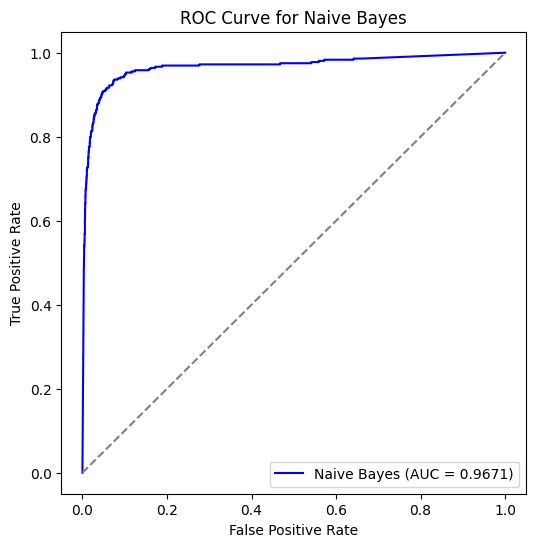


SVM - Average K-Fold Accuracy: 0.9882

Metrics for Support Vector Machine:
Accuracy: 0.9917
Precision: 0.9920
Recall: 0.9917
F1-Score: 0.9917
Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  1  0 35]]


<ipython-input-3-8fe3d1942c94>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


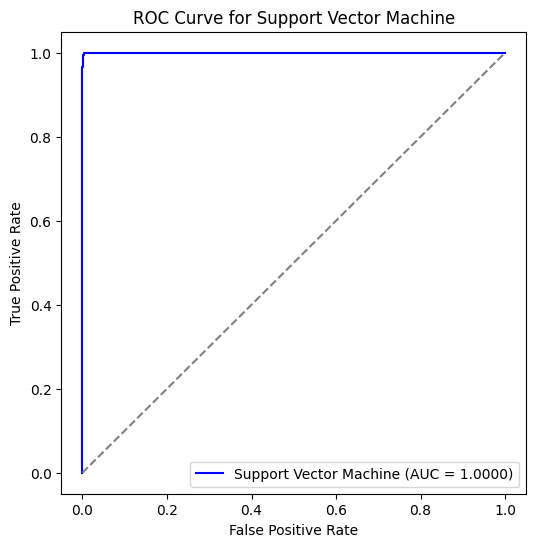

(0.9916666666666667,
 0.9920341394025605,
 0.9916666666666667,
 0.9916595064551902,
 array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
        [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 35]]),
 np.float64(0.9999562757201645))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

digits = load_digits()
X = digits.data
y = digits.target

X = X / 16.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def compute_metrics(y_test, y_pred, model_name, y_prob=None):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    if y_prob is not None:
        y_bin = label_binarize(y_test, classes=np.unique(y_test))
        fpr, tpr, _ = roc_curve(y_bin.ravel(), y_prob.ravel())
        auc_score = auc(fpr, tpr)

        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})', color='blue')
        plt.plot([0, 1], [0, 1], 'k--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.show()

        return acc, precision, recall, f1, conf_matrix, auc_score

    return acc, precision, recall, f1, conf_matrix


nb_model = GaussianNB()

nb_accuracies = cross_val_score(nb_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"\nNaive Bayes - Average K-Fold Accuracy: {np.mean(nb_accuracies):.4f}")

nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)

compute_metrics(y_test, y_pred_nb, "Naive Bayes", y_prob_nb)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)

svm_accuracies = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"\nSVM - Average K-Fold Accuracy: {np.mean(svm_accuracies):.4f}")

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)

compute_metrics(y_test, y_pred_svm, "Support Vector Machine", y_prob_svm)